In [13]:
import network
import mnist_loader
import random
import numpy as np
import seaborn
%matplotlib inline
import sys
sys.path.append("../fig/")
import mnist
import moviepy.editor as mpy
from matplotlib import pyplot as plt
from matplotlib import animation
import time
import matplotlib
import pickle
import cPickle
import gzip

In [3]:
training_data, validation_data, test_data = mnist_loader.load_data()

In [3]:
type(training_data)

tuple

In [4]:
training_data[1]

array([5, 0, 4, ..., 8, 4, 8])

In [5]:
print len(training_data[0])
print len(training_data[1])
print len(training_data)

50000
50000
2


In [4]:
from collections import defaultdict
T = defaultdict(list)

In [5]:
for img,digit in zip(training_data[0],training_data[1]):
    T[digit].append(img)

In [8]:
# making sure our d is what we expect it to be
print T.keys()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [6]:
# Checking the cardinality of T_d for each d
#for digit in T.keys():
for digit in range(0,10):
    print len(T[digit])

4932
5678
4968
5101
4859
4506
4951
5175
4842
4988


In [10]:
# fix d = 0 for now
# choose x1 and x2 uniformly at random
i1,i2 = random.sample(xrange(len(T[0])-1),2)
#print i1,i2
x1,x2 = T[0][i1],T[0][i2]
#print x1
#print x2

In [11]:
x = x2 - x1
#>>> x = numpy.array([0,1,2,3,0,5,6,0,8,9])
#>>> numpy.nonzero(x)
#(array([1, 2, 3, 5, 6, 8, 9]),)
S = set(np.nonzero(x)[0])

In [12]:
def jx(j,x):
    vec = np.zeros_like(x)
    vec[j] = x[j] 
    return vec

def select_random_j(S):
    return random.choice(tuple(S))

In [13]:
y = [0]*len(S)
y[0] = x1

num_S = len(S)
for i in range(1,num_S):
    j = select_random_j(S)
    S.remove(j)
    y[i] = y[i-1] + jx(j,x)

In [14]:
def unflatten_images(flattened_images):
    return [np.reshape(f, (-1, 28)) for f in flattened_images]

what x1 looks like:


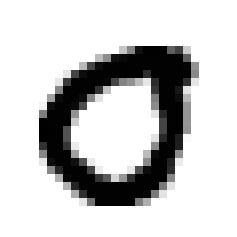

what x2 looks like:


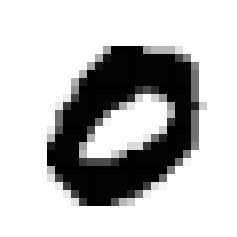

In [15]:
img_x1,img_x2 = unflatten_images([x1,x2])
print "what x1 looks like:"
mnist.plot_mnist_digit(img_x1)
print "what x2 looks like:"
mnist.plot_mnist_digit(img_x2)

In [70]:
from tempfile import NamedTemporaryFile

VIDEO_TAG = """<video controls>
 <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
 Your browser does not support the video tag.
</video>"""

def anim_to_html(anim):
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.mp4') as f:
            anim.save(f.name, fps=20, extra_args=['-vcodec', 'libx264'])
            video = open(f.name, "rb").read()
        anim._encoded_video = video.encode("base64")
    
    return VIDEO_TAG.format(anim._encoded_video)

from IPython.display import HTML

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))

([], <a list of 0 Text yticklabel objects>)

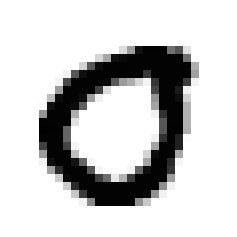

In [24]:
y_imgs = unflatten_images(y)

def update(i):
    #print i #works now! after upgrading to matplotlib 1.5.1
    global y_imgs, mat
    mat.set_data(y_imgs[i])
    return mat 

def init():
    mat.set_data(y_imgs[0])
    return mat

'''
def data_gen():
    for i in range(1,len(y_imgs)):
        yield y_imgs[i]
'''

fig, ax = plt.subplots()
mat = ax.matshow(y_imgs[0])
anim = animation.FuncAnimation(fig=fig, init_func=init, func=update, frames=len(y_imgs), interval=10, blit=False)
plt.xticks(np.array([]))
plt.yticks(np.array([]))
#plt.show()

In [11]:
def unflatten_images(flattened_images):
    return [np.reshape(f, (-1, 28)) for f in flattened_images]

def jx(j,x):
    vec = np.zeros_like(x)
    vec[j] = x[j] 
    return vec

def select_random_j(S):
    return random.choice(tuple(S))

def plot_x1_x2_x(x1,x2,x):
    fig = plt.figure()
    ax1 = fig.add_subplot(1, 3, 1)
    ax1.matshow(x1, cmap = matplotlib.cm.binary)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    ax2 = fig.add_subplot(1, 3, 2)
    ax2.matshow(x2, cmap = matplotlib.cm.binary)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    ax = fig.add_subplot(1, 3, 3)
    ax.matshow(x, cmap = matplotlib.cm.binary)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.show()

In [74]:
plt.ioff()
def generate_new_data(d):
    i1,i2 = random.sample(xrange(len(T[d])-1),2)
    x1,x2 = T[d][i1],T[d][i2]
    x = x2 - x1
    S = set(np.nonzero(x)[0])

    y = [0]*len(S)
    y[0] = x1

    num_S = len(S)
    for i in range(1,num_S):
        j = select_random_j(S)
        S.remove(j)
        y[i] = y[i-1] + jx(j,x)
        
    img_x1,img_x2,img_x = unflatten_images([x1,x2,x])
    '''
    print "what x1 looks like:"
    mnist.plot_mnist_digit(img_x1)
    print "what x2 looks like:"
    mnist.plot_mnist_digit(img_x2)
    print "what x looks like:"
    mnist.plot_mnist_digit(img_x)
    '''
    plot_x1_x2_x(img_x1,img_x2,img_x)
    
    y_imgs = unflatten_images(y)

    def update(i):
        #global y_imgs, mat
        mat.set_data(y_imgs[i])
        return mat 

    def init():
        #global y_imgs
        mat.set_data(y_imgs[0])
        return mat
        
    fig, ax = plt.subplots()
    mat = ax.matshow(y_imgs[0])
    anim = animation.FuncAnimation(fig=fig, init_func=init, func=update, frames=len(y_imgs), interval=10, blit=False)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))

    writer = animation.FFMpegWriter(fps=20)
    anim.save('animation-'+str(d)+'.mp4',writer=writer)
    #anim.save('animation-'+str(d)+'.gif',writer='imagemagick', fps=20)
    #display_animation(anim)
    plt.close(fig)
    
    return y

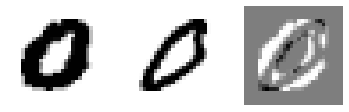

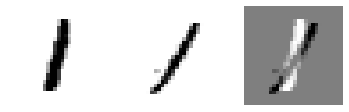

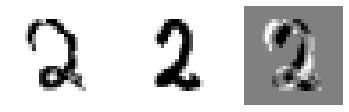

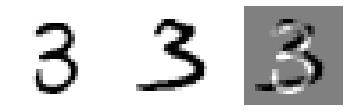

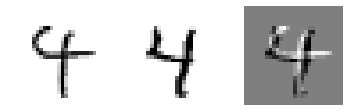

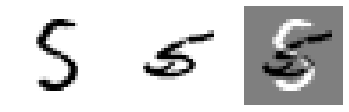

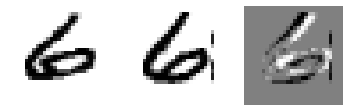

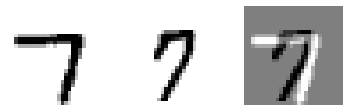

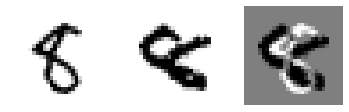

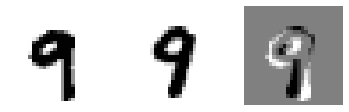

In [75]:
y_ = [0]*10
for i in range(10):
    y_[i] = generate_new_data(i)

In [108]:
def generate_candidate_pairs(d,num_iter):
    num_diff_pix = defaultdict(set)
    k = 0
    while k < num_iter:
        i1,i2 = random.sample(xrange(len(T[d])-1),2)
        if i2 < i1:
            temp = i1
            i1 = i2
            i2 = temp
        x1,x2 = T[d][i1],T[d][i2]
        x = x2 - x1
        S = set(np.nonzero(x)[0])
        num_diff_pix[len(S)].add((i1,i2))
        k+=1
    return num_diff_pix

In [93]:
start = time.time()
num_iter = 1000000
num_diff_pix = generate_candidate_pairs(0,num_iter)
end = time.time()
print(end - start)
# time taken for various iterations
#100:    0.324348926544
#1000:   0.0615410804749
#10000:  0.353132963181
#100000: 3.40469503403
#1000000: 33.022755146

33.022755146


In [102]:
keys = sorted(num_diff_pix.keys())

# Top 10 (fewest pixels nonzero)
for x in keys[:10]:
    print num_diff_pix[x]
    
print
print
    
# Bottom 10 (most pixels nonzero)
for x in keys[-10:]:
    print num_diff_pix[x]

set([(2049, 1265)])
set([(2587, 3462)])
set([(4597, 3053)])
set([(3170, 3043)])
set([(1173, 2452)])
set([(1787, 4895), (3902, 2583)])
set([(2451, 4895)])
set([(4375, 2998), (2120, 704)])
set([(4830, 4303), (4871, 3050), (3868, 1544)])
set([(1520, 3043), (3392, 666), (3462, 992)])


set([(2136, 4077), (4077, 4050), (1254, 4077)])
set([(4065, 4077), (2264, 4077), (4077, 4003)])
set([(1634, 4077), (4077, 2336)])
set([(4077, 2730), (3491, 4077)])
set([(4077, 1359), (2686, 4077)])
set([(4077, 1740)])
set([(4077, 2766)])
set([(4077, 4431)])
set([(4609, 4077)])
set([(2112, 4077)])


Images that have very few pixels different


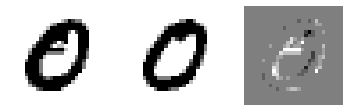

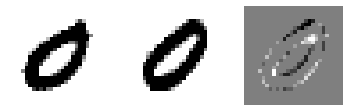

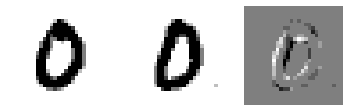

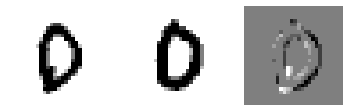

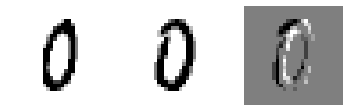



Images that have a lot of pixels different


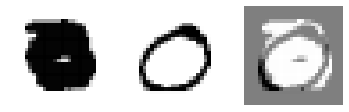

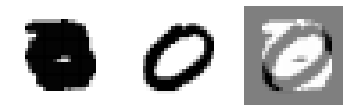

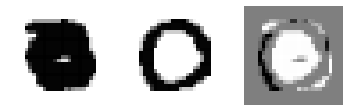

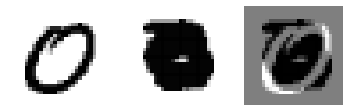

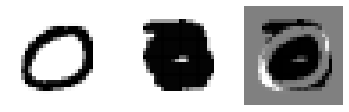

In [107]:
print "Images that have very few pixels different"

for x in keys[:5]:
    for i1,i2 in num_diff_pix[x]:
        x1 = T[0][i1]
        x2 = T[0][i2]
        x = x2 - x1
        img_x1,img_x2,img_x = unflatten_images([x1,x2,x])
        plot_x1_x2_x(img_x1,img_x2,img_x)
    
print
print
    
print "Images that have a lot of pixels different"

for x in keys[-5:]:
    for i1,i2 in num_diff_pix[x]:
        x1 = T[0][i1]
        x2 = T[0][i2]
        x = x2 - x1
        img_x1,img_x2,img_x = unflatten_images([x1,x2,x])
        plot_x1_x2_x(img_x1,img_x2,img_x)

In [111]:
num_iter = 1000000
num_diff_pix = {}
total_num_img = 0
for digit in range(10):
    num_diff_pix[digit] = generate_candidate_pairs(digit,num_iter)
    keylist = sorted(num_diff_pix[digit].keys())
    total_keys = len(keylist)
    for k in keylist[:int(0.2*total_keys)]:
        for i1,i2 in num_diff_pix[digit][k]:
            x1 = T[digit][i1]
            x2 = T[digit][i2]
            x = x2 - x1
            S = set(np.nonzero(x)[0])
            total_num_img += len(S)
    print "digit: ",digit,"processed. num_images added so far:",total_num_img

digit:  0 processed. num_images added so far: 147222
digit:  1 processed. num_images added so far: 3327849
digit:  2 processed. num_images added so far: 3713611
digit:  3 processed. num_images added so far: 4147466
digit:  4 processed. num_images added so far: 5052296
digit:  5 processed. num_images added so far: 6143866
digit:  6 processed. num_images added so far: 7012536
digit:  7 processed. num_images added so far: 7729945
digit:  8 processed. num_images added so far: 8078837
digit:  9 processed. num_images added so far: 9950603


In [113]:
num_iter = 1000000
num_diff_pix = {}
total_num_img = 0
for digit in range(10):
    total_num_pairs = 0
    num_diff_pix[digit] = generate_candidate_pairs(digit,num_iter)
    keylist = sorted(num_diff_pix[digit].keys())
    total_keys = len(keylist)
    y_imgs = []
    for k in keylist[:int(0.05*total_keys)]:
        total_num_pairs += len(num_diff_pix[digit][k])
    print "for digit",digit,"total number of pairs:",total_num_pairs
    '''
        for i1,i2 in num_diff_pix[digit][k]:
            x1 = T[digit][i1]
            x2 = T[digit][i2]
            y_imgs.extend(get_imgs(x1,x2))
    pickle.dump(y_imgs,'newdata/')
    '''

for digit 0 total number of pairs: 26
for digit 1 total number of pairs: 61
for digit 2 total number of pairs: 21
for digit 3 total number of pairs: 23
for digit 4 total number of pairs: 21
for digit 5 total number of pairs: 40
for digit 6 total number of pairs: 26
for digit 7 total number of pairs: 21
for digit 8 total number of pairs: 23
for digit 9 total number of pairs: 31


In [117]:
pickle.dump(num_diff_pix,open('newdata/num_diff_pix.pkl','w'))

In [139]:

filename="../data/mnist.pkl.gz"
f = gzip.open(filename, 'rb')
training_data, validation_data, test_data = cPickle.load(f)

In [7]:
def save(object, filename, bin = 1):
    """Saves a compressed object to disk
    """
    file = gzip.GzipFile(filename, 'wb')
    file.write(pickle.dumps(object, bin))
    file.close()

In [8]:
def get_imgs(x1,x2):
    
    x = x2 - x1
    S = set(np.nonzero(x)[0])
    
    y = [0]*len(S)
    y[0] = x1

    num_S = len(S)
    for i in range(1,num_S):
        j = select_random_j(S)
        S.remove(j)
        y[i] = y[i-1] + jx(j,x)
        
    return y[1:-1]

In [15]:
# @ANKIT:
# This code runs in about 60 seconds.
# Quite fast. Strangely.
# It generates about 20k image arrays.

start = time.time()

training_imgs = []
training_labels = []

num_diff_pix = pickle.load(open('newdata/num_diff_pix.pkl','r'))
for digit in range(10):
    keylist = sorted(num_diff_pix[digit].keys())
    total_keys = len(keylist)
    newimgs = []
    labels = []
    #print total_keys
    for k in keylist[:int(0.05*total_keys)]:
        for i1,i2 in num_diff_pix[digit][k]:
            x1 = T[digit][i1]
            x2 = T[digit][i2]
            N = get_imgs(x1,x2)
            newimgs.extend(N)
            labels.extend([digit]*len(N))
            #print len(N)
    training_imgs.extend(newimgs)
    training_labels.extend(labels)

print len(training_imgs)
print len(training_labels)

#This thing contains over 20K image arrays and labels and comes to under 1 MB when zipped...
save((np.array(training_imgs),np.array(training_labels)),'newdata/mnist-interpolated-smooth-training-data-numpyd.pkl.gz')

end = time.time()
print (end - start)

23601
23601
58.2416651249


In [16]:
# @ANKIT:
# This code runs in about 85 seconds.
# It generates many, many image arrays (sum up the output to see how many)
# I had to split the files to avoid RAM overflow

start = time.time()

training_imgs = []
training_labels = []

num_diff_pix = pickle.load(open('newdata/num_diff_pix.pkl','r'))
for digit in range(10):
    keylist = sorted(num_diff_pix[digit].keys())
    total_keys = len(keylist)
    newimgs = []
    labels = []
    #print total_keys
    for k in keylist[int(0.05*total_keys):int(0.1*total_keys)]:
        for i1,i2 in num_diff_pix[digit][k]:
            x1 = T[digit][i1]
            x2 = T[digit][i2]
            N = get_imgs(x1,x2)
            newimgs.extend(N)
            labels.extend([digit]*len(N))
            #print len(N)
    #training_imgs.extend(newimgs)
    #training_labels.extend(labels)
    print len(newimgs)
    print len(labels)
    #save((newimgs,labels),'newdata/mnist-interpolated-smooth-training-data-'+str(digit)+'-2.pkl.gz')
    save((np.array(newimgs),np.array(newimgs)),'newdata/mnist-interpolated-smooth-training-data'+str(digit)+'-numpyd-2.pkl.gz')
    print "processed digit",digit

end = time.time()
print (end - start)

6644
6644
processed digit 0
20997
20997
processed digit 1
8057
8057
processed digit 2
12809
12809
processed digit 3
13632
13632
processed digit 4
36082
36082
processed digit 5
14971
14971
processed digit 6
8421
8421
processed digit 7
7738
7738
processed digit 8
23623
23623
processed digit 9
85.8157570362
